In [2]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# <font color = 'red'> ЛР 3. Регуляризация и линейная регрессия. Простейший градиентный спуск. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 20.09.2023

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Регуляризация.  </font>

**Регуляризация** - метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

Наиболее распростанены два вида регуляризации в линейной регресии это Грёбневая регуляризация (L2) и Лассо регуляризация (L1).

В случае линейной регрессии регуляризация предпалагает наложение штрафа на функцию потерь регрессии по следующим формулам. Все обозначения в терминах предыдущей ЛР.

$$ \mathcal{L1}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T} + \alpha||\overline{w}||_{1}, $$
$$ \mathcal{L2}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T} + \alpha||\overline{w}||_{2}, $$

Далее задача оптимизации решается уже относительно этих функций потерь.



<font color = 'red' size = 5>Задание 1 </font>

1. Используя встроенные функции пакета sklearn, реализуйте небольшие программы моделирующие лин. регрессию с регуляризацией L1 или L2 на искусственных данных. Сделайте выводы о поведении весовых коэффициентов в зависимости от разного количества фич в том числе полиномиальных.
2. Как регуляризация влияет на метрики качества моделей?
3. С какими проблемами вы столкнулись при использовании формулы вычисления весов регрессии из ЛР2? Можно ли их решить регуляризацией? С помощью матриц покажите на примере алгебраический смысл регуляризации.
4. Модифицируйте вашу собственную функцию для нахождения весов регрессии из ЛР2 таким образом, чтобы она соответсвовала функции потерь L2 - регуляризации. Аналитическое решение задачи оптимизации было получено на лекции. Сравните результаты работы вашей функции со встроенной.

In [496]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [547]:
%%capture --no-stdout

rng = np.random.RandomState(1)
x = 10 * rng.rand(200)
y = np.sin(x) + 0.3 * rng.randn(200)

X = x[:, np.newaxis]

degree = 8  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

alpha = 0.01  
lasso = Lasso(alpha=alpha)
lasso.fit(X_poly, y)

x_values = np.linspace(0, 10, 1000)[:, np.newaxis]
x_values_poly = poly_features.transform(x_values)

predicted_y = lasso.predict(x_values_poly)
lcoef = lasso.coef_
print(lcoef)
print(lasso.score(X_poly, y))

[ 2.53027215e-01 -2.20421763e-01  1.94054738e-02  1.23697071e-03
  1.70207799e-05 -4.15680439e-06 -6.07430575e-07 -5.66519184e-08]
0.5788978692910064


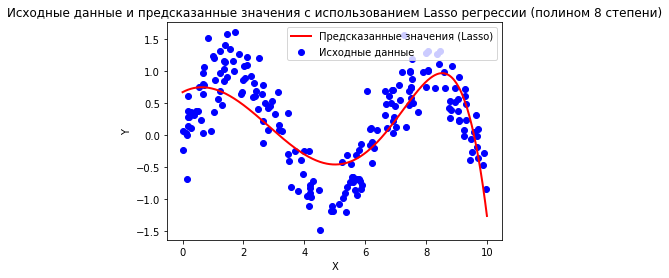

In [545]:
plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x_values, predicted_y, color='red', linewidth=2, label='Предсказанные значения (Lasso)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Исходные данные и предсказанные значения с использованием Lasso регрессии (полином {degree} степени)')
plt.show()

[-1.62985271  0.41710504  0.97194506]
0.9999961219658062


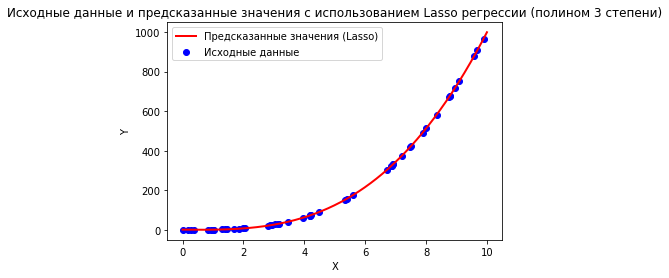

In [548]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = x**3 + 0.1 * rng.randn(50)

X = x[:, np.newaxis]

degree = 3  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

alpha = 0.1  
lasso = Lasso(alpha=alpha)
lasso.fit(X_poly, y)

x_values = np.linspace(0, 10, 1000)[:, np.newaxis]
x_values_poly = poly_features.transform(x_values)

predicted_y = lasso.predict(x_values_poly)
print(lasso.coef_)
print(lasso.score(X_poly, y))

plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x_values, predicted_y, color='red', linewidth=2, label='Предсказанные значения (Lasso)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Исходные данные и предсказанные значения с использованием Lasso регрессии (полином {degree} степени)')
plt.show()

In [549]:
%%capture --no-stdout

rng = np.random.RandomState(1)
x = 10 * rng.rand(200)
y = np.sin(x) + 0.3 * rng.randn(200)

X = x[:, np.newaxis]

degree = 8  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

alpha = 0.001  
ridge = Ridge(alpha=alpha)
ridge.fit(X_poly, y)

x_values = np.linspace(0, 10, 1000)[:, np.newaxis]
x_values_poly = poly_features.transform(x_values)

predicted_y = ridge.predict(x_values_poly)
rcoef = ridge.coef_
print(rcoef)
print(ridge.score(X_poly, y))
plt.bar(np.arange(0, len(rcoef)),rcoef)

[ 1.42417248e+00 -5.53731501e-01  2.67041298e-01 -2.00316011e-01
  6.44232935e-02 -9.46438714e-03  6.52749801e-04 -1.72876148e-05]
0.8144425347588038


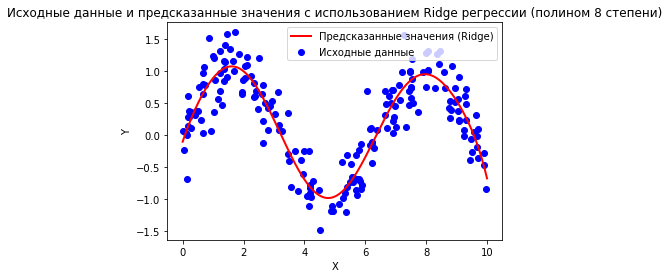

In [73]:
plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x_values, predicted_y, color='red', linewidth=2, label='Предсказанные значения (Ridge)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Исходные данные и предсказанные значения с использованием Ridge регрессии (полином {degree} степени)')
plt.show()

[-1.05307798e-01  3.36774556e-01  7.54117033e-01  7.77588040e-02
 -1.21273450e-02  9.17648935e-04 -2.69228566e-05]
0.9999999100614534


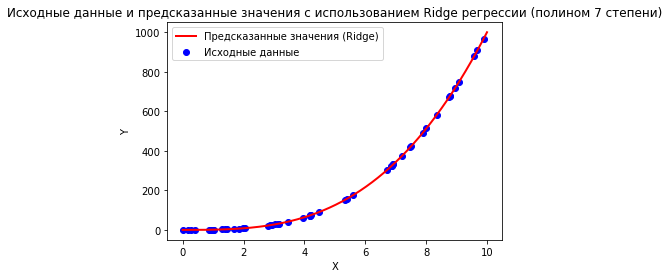

In [76]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = x**3 + 0.1 * rng.randn(50)

X = x[:, np.newaxis]

degree = 7  # Степень полинома
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

alpha = 0.1  # Параметр регуляризации
ridge = Ridge(alpha=alpha)
ridge.fit(X_poly, y)

x_values = np.linspace(0, 10, 1000)[:, np.newaxis]
x_values_poly = poly_features.transform(x_values)

predicted_y = ridge.predict(x_values_poly)
print(ridge.coef_)
print(ridge.score(X_poly, y))

plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x_values, predicted_y, color='red', linewidth=2, label='Предсказанные значения (Ridge)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Исходные данные и предсказанные значения с использованием Ridge регрессии (полином {degree} степени)')
plt.show()

Предположим, у нас есть матрица $X$ размером $(m \times n)$. Мы хотим вычислить веса $w$. В линейной регрессии без регуляризации, мы решаем систему:

$$
X^T X w = X^T y
$$

$$
w = (X^T X)^{-1}X^T y
$$

Теперь, с регуляризацией, уравнение становится:

$$
(X^T X + \alpha E) w = X^T y
$$

$$
w = (X^T X + \alpha E)^{-1}X^T y
$$

Где $E$ - это единичная матрица размером $(n \times n)$. Прибавление $\alpha E$ к $(X^T X)$ помогает сделать матрицу $(X^T X + \alpha E)$ невырожденной.


In [198]:
def Qmatrix(X):
    return np.hstack((np.ones((X.shape[0],1)),X))

def fit(X, Y, fit_intercept = False, alpha = 0.01):
    if fit_intercept:
        Q = Qmatrix(X)
        coef = np.dot(np.dot(np.linalg.inv(np.dot(Q.T, Q) + alpha * np.eye(Q.shape[1])), Q.T),Y)
        return coef[0], coef[1:]
    else:
        coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha * np.eye(X.shape[1])), X.T),Y)
        return 0, coef

def predict(X, coef):
    return np.dot(Qmatrix(X), np.concatenate([[coef[0]], coef[1:][0]]))

def score(X, y, coef):
    f = predict(X, coef)
    numerator = np.dot((y - f), (y - f).T)
    denominator = np.dot((y - np.mean(y)), (y - np.mean(y).T))
    return float(1 - numerator/denominator)

Coef =  (-0.07393748223668471, array([ 1.07267773e+00,  2.87773061e-01, -4.96924866e-01,  1.33640864e-01,
       -1.34825728e-02,  4.68925321e-04]))
score =  0.8109484030302938


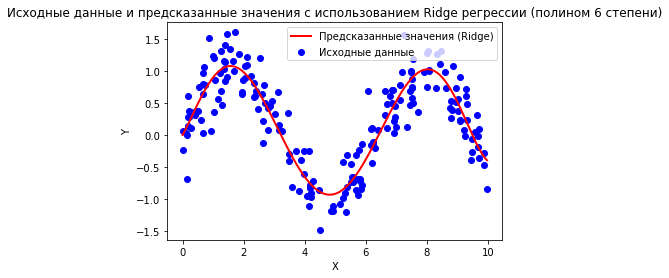

In [210]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(200)
y = np.sin(x) + 0.3 * rng.randn(200)

X = x[:, np.newaxis]

degree = 6  # Степень полинома
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X = poly_features.fit_transform(X)

alpha = 0.01 
coef = fit(X,y,fit_intercept = True,alpha=alpha)

x_values = np.linspace(np.min(x),np.max(x),200)[:, np.newaxis]
x_values_poly = poly_features.transform(x_values)

predicted_y = predict(x_values_poly, fit(X,y))
print('Coef = ', coef)
print('score = ', score(X, y, coef))

plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x_values, predicted_y, color='red', linewidth=2, label='Предсказанные значения (Ridge)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Исходные данные и предсказанные значения с использованием Ridge регрессии (полином {degree} степени)')
plt.show()

## <font color = 'green'> 2. Переобучение. </font>

**Переобучение** - явление, когда построенная модель МО хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах из тестовой выборки. 

<font color = 'orange' size = 3>Пример 1 </font>

Изучите следующий пример.

In [81]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(60)
y = x**2/10 + 0.9 * rng.randn(60)

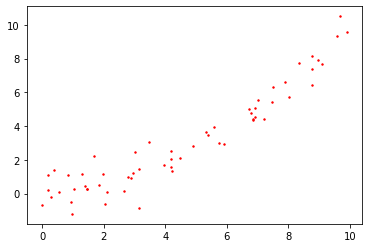

In [82]:
plt.scatter(x, y, c ='red',s=2)

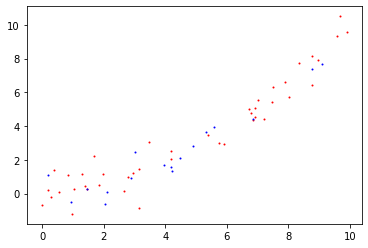

In [83]:
# разделили данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x[:, np.newaxis], y, test_size=0.27, random_state=42) 
plt.scatter(X_train, y_train, c='red', s=1)
plt.scatter(X_test, y_test, c='blue', s=1)

По наблюдениям из ЛР2 можно сделать вывод, что добавление полиномиальных фич (усложнение модели) повышает точность. Попробуем построить график, на котором увидим зависимость между метрикой R2 и степенью полиномиальных фич в модели. Это параметр можно считать гиперпараметром модели. 

**Гиперпараметры** – это внешние переменные конфигурации, с помощью которых специалисты по данным управляют обучением модели МО. Гиперпараметры (иногда их называют гиперпараметрами модели) настраиваются вручную перед обучением модели. Кстати, коэффициенты $\alpha$ в формулах регуляризаций тоже гиперпараметры.

График зависимости гиперпараметра от метрики качества модели называют  **валидационной кривой**.

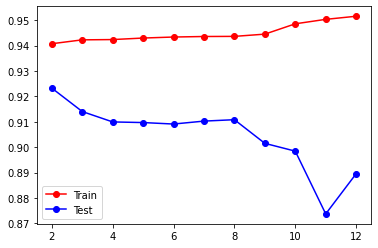

In [84]:
degress = list(range(2, 13))
scores_test = []
scores_train = []
for i in degress:
    model = make_pipeline(PolynomialFeatures(degree=i),
                          LinearRegression(fit_intercept=False))
    model.fit(X_train, y_train)
    scores_test.append(model.score(X_test, y_test))
    scores_train.append(model.score(X_train, y_train))
plt.plot(degress, scores_train, 'r-o')
plt.plot(degress, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

Как видим, при увеличении количества полиномиальных фич наблюдаем падение качества валидации на тестовых данных, при росте качества на обучающих - классическое переобучение.

<font color = 'red' size = 5>Задание 2. </font>

1. На искусственных данных смоделируйте переобучение модели линейной регрессии. 
2. С помощью различных моделей регуляризации попробуйте сохранив сложность модели, которая увеличивает качество, избежать переобучения. Потренируйтесь в подборе коэффициентов силы регуляризации. 

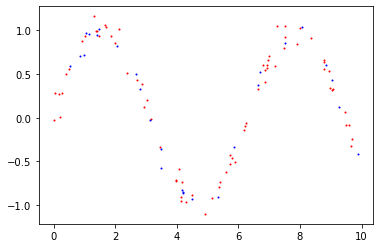

In [500]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)


X_train, X_test, y_train, y_test = train_test_split(x[:, np.newaxis], y, test_size=0.27, random_state=42) 
plt.scatter(X_train, y_train, c='red', s=1)
plt.scatter(X_test, y_test, c='blue', s=1)

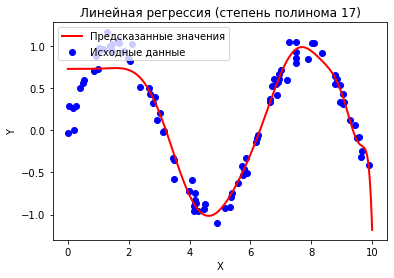

In [550]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

X = x[:, np.newaxis]

degree = 17
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, y)

x_values = np.linspace(0, 10, 1000)[:, np.newaxis]
predicted_y = polyreg.predict(x_values)

plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x_values, predicted_y, color='red', linewidth=2, label='Предсказанные значения')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Линейная регрессия (степень полинома {degree})')
plt.show()


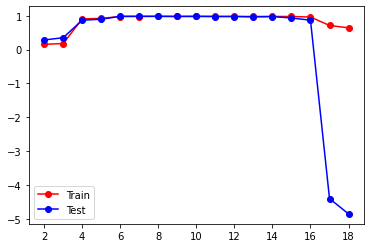

In [502]:
degress = list(range(2, 19))
scores_test = []
scores_train = []
for i in degress:
    model = make_pipeline(PolynomialFeatures(degree=i),
                          LinearRegression(fit_intercept=False))
    model.fit(X_train, y_train)
    scores_test.append(model.score(X_test, y_test))
    scores_train.append(model.score(X_train, y_train))
plt.plot(degress, scores_train, 'r-o')
plt.plot(degress, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

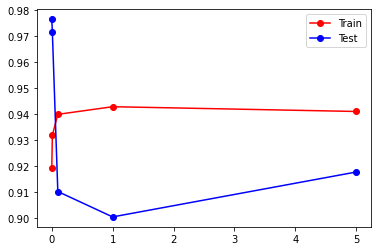

In [503]:
alpha = [0.001, 0.01, 0.1, 1, 5]
scores_test = []
scores_train = []
for i in alpha:
    model = make_pipeline(PolynomialFeatures(degree=17),
                         Ridge(alpha = i))
    model.fit(X_train, y_train)
    scores_test.append(model.score(X_test, y_test))
    scores_train.append(model.score(X_train, y_train))
plt.plot(alpha, scores_train, 'r-o')
plt.plot(alpha, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.536113463242808, tolerance: 0.0030016062712364157
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9019638066481366, tolerance: 0.0030016062712364157
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.609911926391838, tolerance: 0.0030016062712364157
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

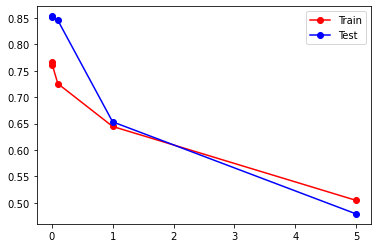

In [505]:
alpha = [0.001, 0.01, 0.1, 1, 5]
scores_test = []
scores_train = []
for i in alpha:
    model = make_pipeline(PolynomialFeatures(degree=17),
                         Lasso(alpha = i))
    model.fit(X_train, y_train)
    scores_test.append(model.score(X_test, y_test))
    scores_train.append(model.score(X_train, y_train))
plt.plot(alpha, scores_train, 'r-o')
plt.plot(alpha, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

## <font color = 'green'> 3. Градиентный спуск.  </font>

В предыдущей ЛР мы решили задачу оптимизации, отыскав аналититческое решение в виде формулы. Способ хороший, но не всегда возможный в силу свойств функций и данных. Попробуем вооружиться ещё одним методом решения задач обучения моделей.

<font color = 'red' size = 5>Задание 3. </font>

1. Изучите базовый алгоритм [градиентного спуска](https://en.wikipedia.org/wiki/Gradient_descent)  по ссылке или лекционным записям. 
2. Реализуйте простой алгоритм градиентного спуска с постоянным шагом, для решения задачи нахождения минимума некторой функции двух переменных. Графически подтвердите ваши вычисления (на лекции был показан пример). 
3. Используя градиентный спуск, реализуйте собственную функцию обучения для какой либо из изученных ранее регрессий. Тщательно протестируйте. Всегда ли будет сходится (выдавать корректное решение) ваш алгоритм? От каким параметров зависит работа алгоритма? Сравните полученные резульататы со встроенными функциями.
4. Подумайте над улучшением алгоритма с точки зрения сходимости.
 

Алгоритм градиентного спуска с постоянным шагом:
1. Инициализируем $X_{0}$ случайными значениями или нулями.
2. Повторяем до сходимости:

Вычисляем градиент функции в текущей точке: $\nabla_{X_{i-1}} F$
Обновляем значения переменных:
$$ X_{i} = X_{i-1} - \alpha \cdot \nabla_{X_{i-1}} F $$ 

Проверяем условие сходимости (например, разница между значениями функции в текущей и предыдущей точке меньше некоторого заданного $\varepsilon$:

$$|F(X_{i}) - F(X_{i-1})| < \varepsilon$$

In [511]:
np.array([3,4]) - np.array([2,1])

array([1, 3])

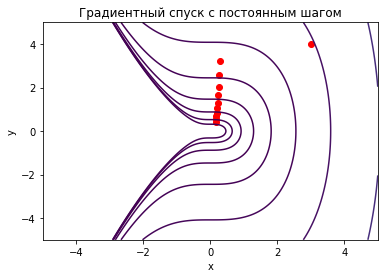

In [553]:
def func(x, y):
    return x**3 + y**2

def gradient(x, y):
    return 3 * x**2, 2 * y

alpha = 0.1  
x, y = 3, 4  

trajectory = [(x, y)]
while True:
    grad_x, grad_y = gradient(x, y)
    x_new = x - alpha * grad_x
    y_new = y - alpha * grad_y
    arr = abs (np.array([x_new, y_new]) - np.array([x, y])) < alpha
    if arr.all():
        break
    x = x_new
    y = y_new
    trajectory.append((x, y))

x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = func(X, Y)

plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10))
plt.scatter(*zip(*trajectory), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Градиентный спуск с постоянным шагом')
plt.show()


In [532]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epsilon = 0.0000001):
        self.lr = learning_rate
        self.e = epsilon
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)

        while True:
            y_predicted = np.dot(X, self.weights)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))

            new_weights =  self.weights - self.lr * dw
            arr = abs (new_weights - self.weights) < self.e
            if arr.all():
                break
            self.weights = new_weights

    def predict(self, X):
        return np.dot(X, self.weights)

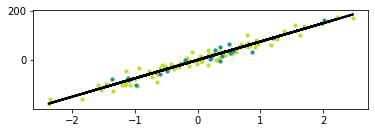

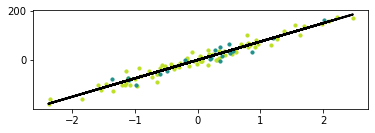

In [552]:
from sklearn import datasets

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

regressor = LinearRegressionGD(learning_rate=0.01)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)


rg = LinearRegression()
rg.fit(X_train, y_train)
predictions_rg = rg.predict(X_test)

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
plt.subplot(2,1,1)
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()
plt.subplot(2,1,2)

y_pred_line_rg = rg.predict(X)
cmap = plt.get_cmap('viridis')
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line_rg, color='black', linewidth=2, label="Prediction")
plt.show()


$$ \mathcal{L}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}, $$
Далее применяем формулы из п. 1. $$\nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = (-2 Q^{T} \overline{y}+ 2 Q^{T} Q \overline{w}) = 0.$$
$$ \mathcal{L1}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T} + \alpha||\overline{w}||_{1}, $$

In [57]:
def Qmatrix(X):
    return np.hstack((np.ones((X.shape[0],1)),X))

def fit(X, Y, fit_intercept = False, alpha = 0.01):
    if fit_intercept:
        Q = Qmatrix(X)
        coef = np.dot(np.dot(np.linalg.inv(np.dot(Q.T, Q) + alpha * np.eye(Q.shape[1])), Q.T),Y)
        return coef[0], coef[1:]
    else:
        coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha * np.eye(X.shape[1])), X.T),Y)
        return 0, coef

def predict(X, coef):
    return np.dot(X, coef)

def score(X, y, coef):
    f = predict(X, coef)
    numerator = np.dot((y - f), (y - f).T)
    denominator = np.dot((y - np.mean(y)), (y - np.mean(y).T))
    return float(1 - numerator/denominator)

In [193]:
def gradL(X, Y, w, alpha = 0.1):
    mat1 = -2*np.matmul(X.T, Y)
    mat2 = 2*np.matmul(np.matmul(X.T, X), w)
    return mat1 + mat2 + alpha*np.sign(w)

In [197]:
def L(X, Y, w, alpha = 0.1):
    mat1 = Y - np.dot(X, w)    
    return np.dot(mat1, mat1.T) + alpha*np.linalg.norm(w, ord=1)

In [194]:
grad = gradL(X, y, np.zeros(X.shape[1]))
print(grad)

[-1279.59368544]


In [195]:
def LRGD(X, Y, alpha = 0.1, e = 0.01):

    weights = np.zeros(X.shape[1])
    print(weights)
    while True:
        grad = gradL(X, Y, weights)
        new_weights = weights - alpha * grad
        arr = abs (new_weights - weights) < e
        if arr.all():
            break
        weights = new_weights
        
    return weights
    

In [196]:
from sklearn import datasets

X, y = datasets.make_regression(n_samples=19, n_features=1, noise = 10, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

w = LRGD(X_train, y_train)
print(w)

[0.]
[52.17031047]


In [187]:
y_pred_line = predict(X, w)
y_pred_line

array([-60.35146349,  32.27618976,  80.70639189,  37.7369563 ,
        36.18524952, -51.95687814,  18.31163045,  22.1761589 ,
       -82.66788632, -59.8642122 ,  26.08261628,  17.33374975,
       -31.66149798,  17.33358736,  -4.59030537, -33.79106313,
       -21.82292017,   2.63781996,  31.22785267])

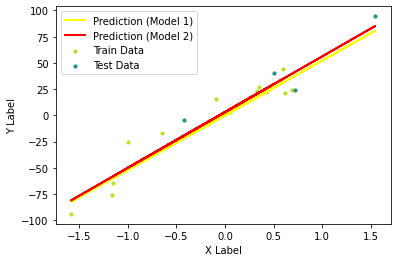

In [188]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('viridis')
plt.scatter(X_train, y_train, color=cmap(0.9), s=10, label='Train Data')
plt.scatter(X_test, y_test, color=cmap(0.5), s=10, label='Test Data')
plt.plot(X, y_pred_line, color='yellow', linewidth=2, label="Prediction (Model 1)")

y_pred_line_rg = rg.predict(X)
plt.plot(X, y_pred_line_rg, color='red', linewidth=2, label="Prediction (Model 2)")

plt.legend()
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()


In [189]:
rg.coef_

array([53.13902752])

In [190]:
w

array([52.17031047])

In [191]:
rg.score(X_train, y_train)

0.9117057575503482

In [192]:
score(X_test, y_test, w)

0.8336397022991011

Сходимость градиентного спуска зависит от выбора скорости обучения (learning rate). Если learning rate слишком большой, градиентный спуск может расходиться, пропустив оптимальное решение. С другой стороны, если learning rate слишком маленький, алгоритм будет сходиться очень медленно.

<font color = 'red' size = 5>Задание 4. </font>

1. Используя полученные знания о линейной регрессии примените их на реальных данных (два датасета ниже). Применяйте различные методы, стройте валидационные кривые, подбирайте гиперпараметры, преобразуйте данные, для получения лучших по качеству эстиматоров. 
2. При работе используйте не только встроенные, но и свои собственные функции. 
3. Самостоятельно изучите модель регуляризации [Elastic net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) и найдите ей применение.

Данные.

1. Данные о велосипедном трафике из файлов (fermont_bridge.csv) и (BycicleWeather.csv). В одном из файлов данные о количестве велосипедистов, проехавщих по мосту в виде временного ряда, а в другом данные о погоде в том же районе. Совместите и предскажите велотрафик.
2. Данные о расходе топлива автомобилями по ссылке [AutoMpg](https://www.kaggle.com/datasets/uciml/autompg-dataset/data)


In [12]:
bike_data = pd.read_csv('fremont-bridge.csv', index_col='Date', parse_dates=True)
weather_data = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

print('bike_data.shape = ', bike_data.shape)
print('weather_data.shape = ', weather_data.shape)

bike_data.shape =  (45984, 2)
weather_data.shape =  (1340, 25)


In [13]:
bike_data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [14]:
bike_day = bike_data.resample('d').sum()

In [15]:
bike_day.head()

,West,East
Date,,
2012-10-03,1760.0,1761.0
2012-10-04,1708.0,1767.0
2012-10-05,1558.0,1590.0
2012-10-06,1080.0,926.0
2012-10-07,1191.0,951.0


In [17]:
bike_day['Total'] = bike_day.sum(axis=1) 
bike_day.head()

,West,East,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0


In [18]:
bike_day = bike_day[['Total']]
bike_day.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


In [419]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(7):
    bike_day[days[i]] = (bike_day.index.dayofweek == i).astype(float)

In [420]:
bike_day.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [421]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [422]:
cal = USFederalHolidayCalendar()

holidays = cal.holidays('2012','2017') 

In [423]:
bike_day = bike_day.join(pd.Series(1,index=holidays,name='Holidays'))

In [424]:
bike_day['Holidays'].fillna(0,inplace=True)

In [425]:
bike_day[40:]

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Holidays
Date,,,,,,,,,
2012-11-12,1631.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-11-13,2087.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-14,2600.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-11-15,2520.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-11-16,2006.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2017-12-27,997.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-12-28,972.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2017-12-29,591.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [426]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

In [427]:
bike_day['Daylight_hrs'] = list(map(hours_of_daylight,bike_day.index))

In [428]:
bike_day

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Holidays,Daylight_hrs
Date,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208
...,...,...,...,...,...,...,...,...,...,...
2017-12-27,997.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.241450
2017-12-28,972.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.249949
2017-12-29,591.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.259788


<AxesSubplot:xlabel='Date'>

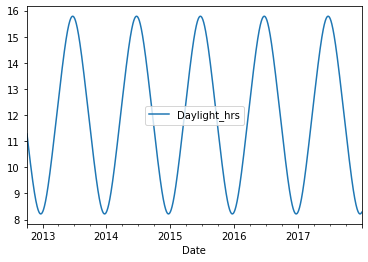

In [429]:
%matplotlib inline
bike_day[['Daylight_hrs']].plot()

In [430]:
weather_data = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [431]:
weather_data['TMIN'] /= 10
weather_data['TMAX'] /= 10

weather_data['Temp (C)'] = 0.5 * (weather_data['TMIN'] + weather_data['TMAX']) 

In [405]:
weather_data

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03,Temp (C)
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,12.8,5.0,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,8.90
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,10.6,2.8,45,180,200,...,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999,6.70
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,11.7,7.2,23,180,170,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,9.45
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,12.2,5.6,47,180,190,...,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999,8.90
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,8.9,2.8,61,200,220,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,5.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,5,0,0,23.3,15.6,26,230,240,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,19.45
2015-08-29,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,325,0,0,22.2,13.3,58,210,210,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,17.75
2015-08-30,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,102,0,0,20.0,12.8,47,200,200,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,16.40


In [432]:
weather_data['PRCP'] /= 254
weather_data['Dry day'] = (weather_data['PRCP'] == 0).astype(int) ## Returns 1 if it is a dry day i.e. PRCP = 0

In [407]:
weather_data

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03,Temp (C),Dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.000000,0,0,12.8,5.0,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,8.90,1
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.429134,0,0,10.6,2.8,45,180,200,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,6.70,0
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.031496,0,0,11.7,7.2,23,180,170,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,9.45,0
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.799213,0,0,12.2,5.6,47,180,190,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,8.90,0
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.051181,0,0,8.9,2.8,61,200,220,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,5.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.019685,0,0,23.3,15.6,26,230,240,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,19.45,0
2015-08-29,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1.279528,0,0,22.2,13.3,58,210,210,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,17.75,0
2015-08-30,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.401575,0,0,20.0,12.8,47,200,200,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,16.40,0


In [433]:
bike_day = bike_day.join(weather_data[['PRCP','Temp (C)','Dry day']])

In [434]:
bike_day

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Holidays,Daylight_hrs,PRCP,Temp (C),Dry day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,997.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.241450,NaN,NaN,NaN
2017-12-28,972.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.249949,NaN,NaN,NaN
2017-12-29,591.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.259788,NaN,NaN,NaN


In [435]:
bike_day['annual'] = (bike_day.index - bike_day.index[0]).days /365

In [436]:
bike_day.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Holidays,Daylight_hrs,PRCP,Temp (C),Dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [475]:
bike_day.dropna(axis=0,how='any',inplace=True) ## Drops all the rows that contain Nan

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Holidays',
                'Daylight_hrs', 'PRCP', 'Dry day', 'Temp (C)', 'annual']
X = bike_day[column_names]
y = bike_day['Total']  ## y is the actual total traffic

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [438]:
bike_day

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Holidays,Daylight_hrs,PRCP,Temp (C),Dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000,15.85,1.0,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28,2653.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.418591,0.019685,19.45,0.0,2.901370
2015-08-29,699.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.362212,1.279528,17.75,0.0,2.904110
2015-08-30,1213.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.305611,0.401575,16.40,0.0,2.906849


In [439]:
model = LinearRegression(fit_intercept=False)

In [476]:
model.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [477]:
model.score(X_test,y_test)

0.8647921301207012

In [443]:
bike_day['Predicted'] = model.predict(X)
bike_day

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Holidays,Daylight_hrs,PRCP,Temp (C),Dry day,annual,Predicted
Date,,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000,13.35,1.0,0.000000,3463.400275
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000,13.60,1.0,0.002740,3361.947831
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000,15.30,1.0,0.005479,3160.933823
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000,15.85,1.0,0.008219,1908.094174
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000,15.85,1.0,0.010959,1870.448616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28,2653.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.418591,0.019685,19.45,0.0,2.901370,3239.485894
2015-08-29,699.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.362212,1.279528,17.75,0.0,2.904110,1002.649045
2015-08-30,1213.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.305611,0.401575,16.40,0.0,2.906849,1460.888106


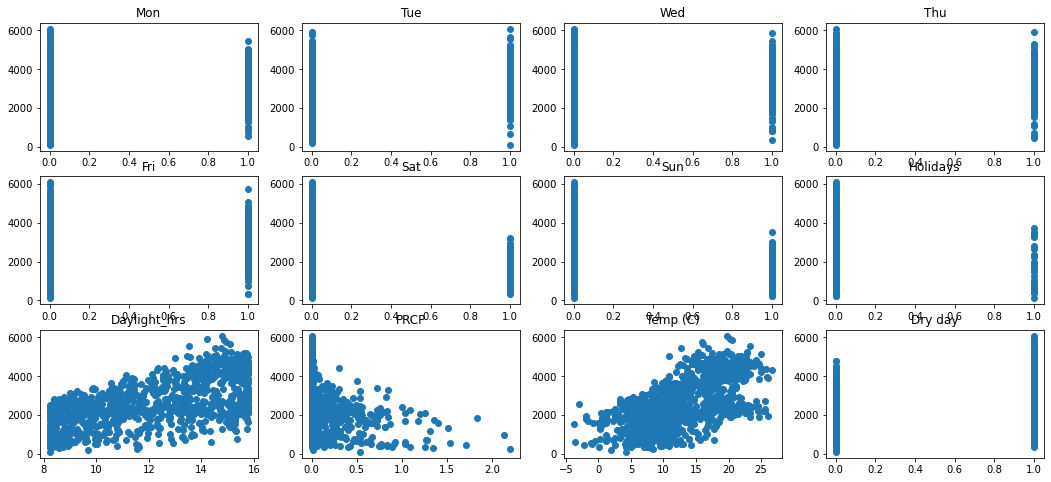

In [446]:
plt.figure(figsize=(18, 8))
for i, col in enumerate(bike_day.columns[1:13]):
    plt.subplot(3, 4, i+1)
    plt.scatter(bike_day[col], bike_day['Total'])
    plt.title(col)

<AxesSubplot:xlabel='Date'>

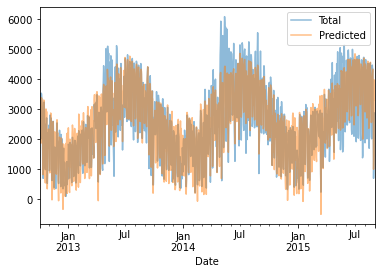

In [444]:
bike_day[['Total','Predicted']].plot(alpha = 0.5)

In [478]:
ridge = Ridge(alpha=1e-3, random_state=17)
ridge.fit(X_train,y_train)
print('Ridge')
print('MSE = ', mean_squared_error(y_test, ridge.predict(X_test)), '\nscore = ', ridge.score(X_test,y_test))


print('Lasso')
lasso = Lasso(alpha=1e-4, random_state=17)
lasso.fit(X_train,y_train)
print('MSE = ', mean_squared_error(y_test, lasso.predict(X_test)), '\nscore = ', lasso.score(X_test,y_test))

Ridge
MSE =  238288.0225419125 
score =  0.8647920975469953
Lasso
MSE =  238287.96496667145 
score =  0.8647921302159791


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1053307.7131991386, tolerance: 110344.0425784946
  model = cd_fast.enet_coordinate_descent(


In [479]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

print('MSE = ', mean_squared_error(y_test, elastic_net.predict(X_test_scaled)), '\nscore = ', lasso.score(X_test,y_test))

MSE =  243368.8395826919 
score =  0.8647921302159791


In [480]:
dataframe=pd.read_csv("auto-mpg.csv")
dataframe.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [481]:
dataframe.shape

(398, 9)

In [482]:
dataframe.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [465]:
dataframe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [486]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [520]:
dataframe['horsepower'] = pd.to_numeric(dataframe['horsepower'].replace('?',''))
dataframe['horsepower'].dtype

dtype('float64')

In [525]:
dataframe["horsepower"] = dataframe["horsepower"].fillna(dataframe["horsepower"].mean())

In [526]:
column_names = ['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin','horsepower']
X = dataframe[column_names]
y = dataframe['mpg']

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [528]:
linreg_mdl = LinearRegression()
linreg_mdl.fit(X_train, y_train)
print('MSE = ', mean_squared_error(y_test, linreg_mdl.predict(X_test)), '\nscore = ', linreg_mdl.score(X_test,y_test))

MSE =  9.278723220932948 
score =  0.8383254449415632


In [530]:
print('Ridge')
ridge = Ridge(alpha=1e-3, random_state=17)
ridge.fit(X_train,y_train)
print('MSE = ', mean_squared_error(y_test, ridge.predict(X_test)), '\nscore = ', ridge.score(X_test,y_test))


print('Lasso')
lasso = Lasso(alpha=1e-4, random_state=17)
lasso.fit(X_train,y_train)
print('MSE = ', mean_squared_error(y_test, lasso.predict(X_test)), '\nscore = ', lasso.score(X_test,y_test))

Ridge
MSE =  9.278720631517425 
score =  0.8383254900601202
Lasso
MSE =  9.278333532686819 
score =  0.8383322349569893


In [531]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

print('MSE = ', mean_squared_error(y_test, elastic_net.predict(X_test_scaled)), '\nscore = ', lasso.score(X_test,y_test))

MSE =  9.50936348327902 
score =  0.8383322349569893
